# Install required packages

In [95]:
!pip install missingno
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Import required libraries

In [96]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the csv file using read.csv() function

In [192]:
my_netflix_data = pd.read_csv("titles.csv")

# Display top six records of the datset

In [193]:
my_netflix_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Insert dimension of the datset

In [194]:
my_netflix_data.shape

(5850, 15)

# Exploratory Data Analysis of the dataset using Non-Graphical approach

# 1. Get the information of the dataset

In [195]:
my_netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

# 2. Check for the unique values of the data in each coulmn using nunique() function

In [196]:
my_netflix_data.nunique()

id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64

# 3. Get the number of missing values in each column using isnull().sum() function

In [197]:
my_netflix_data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

# 4. Calculate the percentage of the missing value

In [198]:
(my_netflix_data.isnull().sum()/(len(my_netflix_data)))*100

id                       0.000000
title                    0.017094
type                     0.000000
description              0.307692
release_year             0.000000
age_certification       44.769231
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.000000
imdb_id                  6.888889
imdb_score               8.239316
imdb_votes               8.512821
tmdb_popularity          1.555556
tmdb_score               5.316239
dtype: float64

# 5. Plot the graph for missing values

<AxesSubplot:>

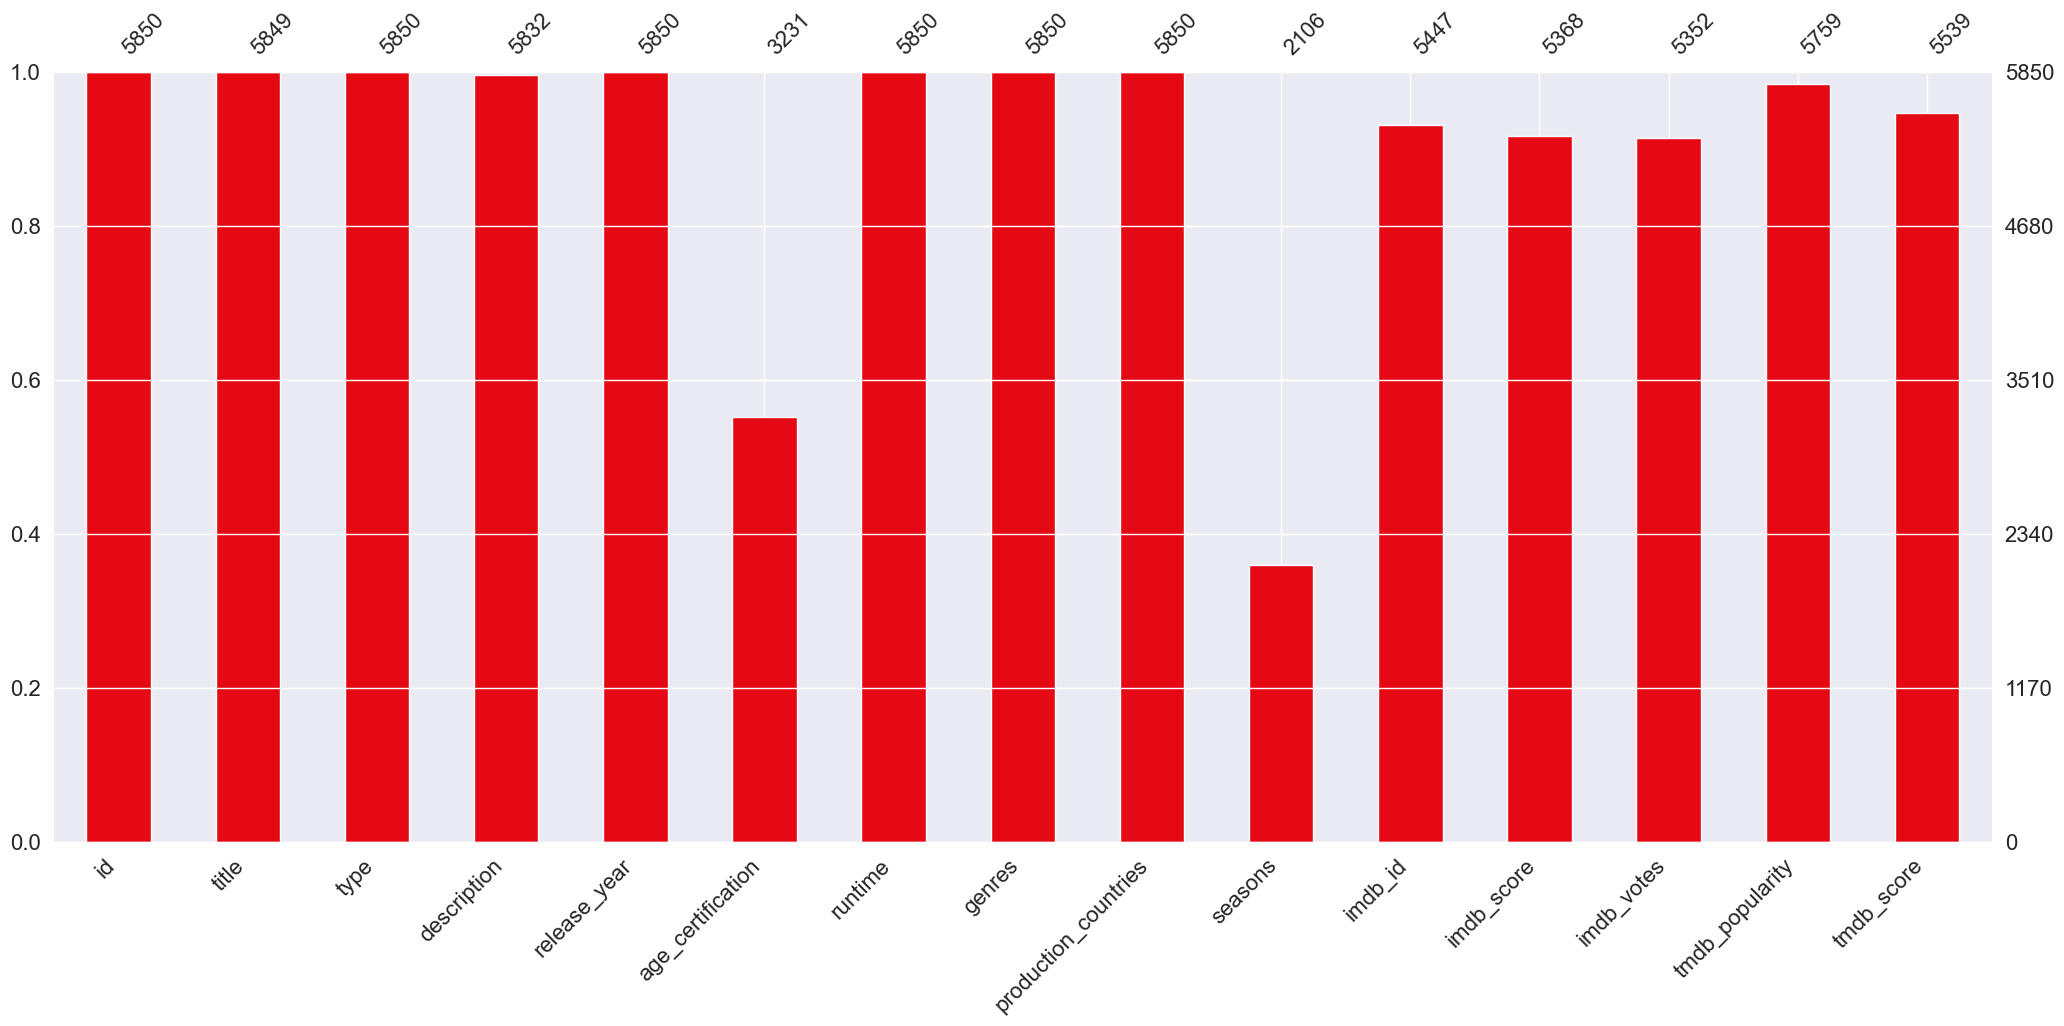

In [199]:
c = '#e50914'
msno.bar(my_netflix_data, color = c)

# 6. Creating heat map for missing values

<AxesSubplot:>

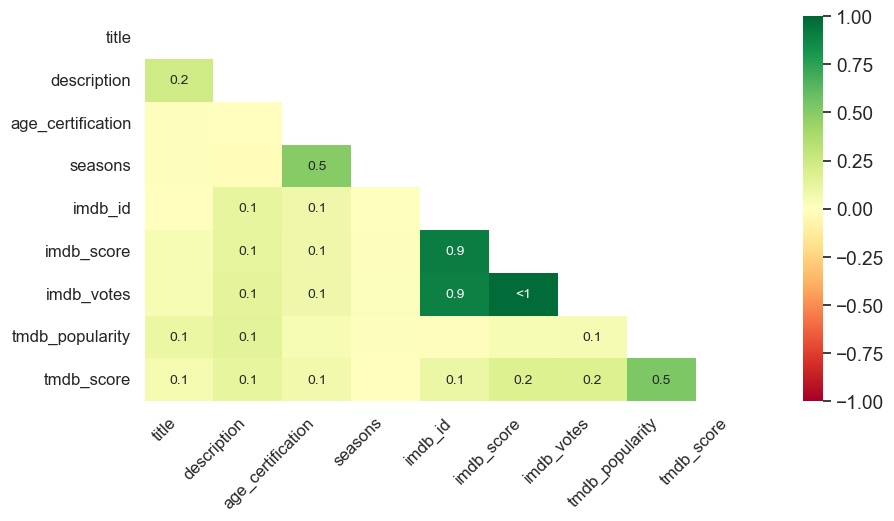

In [200]:
msno.heatmap(my_netflix_data, cmap="RdYlGn", figsize=(10,5), fontsize=12)

#Above I have plotted a heatmap showing nullity correlation between various columns of Netflix dataset. The majority of entries are empty in the heatmap because Netflix dataset has fewer missing values.
The nullity correlation ranges from -1 to 1.

-1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
0 - No correlation represents that variables' values present or absent do not have any effect on one another.
1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

# 7. Produce the summary of the data

In [201]:
my_netflix_data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5850.0,2016.417094,6.937726,1945.000000,2016.0000,2018.000,2020.0000,2022.000
runtime,5850.0,76.888889,39.002509,0.000000,44.0000,83.000,104.0000,240.000
seasons,2106.0,2.162868,2.689041,1.000000,1.0000,1.000,2.0000,42.000
imdb_score,5368.0,6.510861,1.163826,1.500000,5.8000,6.600,7.3000,9.600
imdb_votes,5352.0,23439.382474,95820.470909,5.000000,516.7500,2233.500,9494.0000,2294231.000
tmdb_popularity,5759.0,22.637925,81.680263,0.009442,2.7285,6.821,16.5900,2274.044
tmdb_score,5539.0,6.829175,1.170391,0.500000,6.1000,6.900,7.5375,10.000


# 8. Display summary of the dataset including all the variables (including object,category) and display correlation plot

In [202]:
my_netflix_data.describe(include="all")

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5849,5850,5832,5850.000000,3231,5850.000000,5850,5850,2106.000000,5447,5368.000000,5.352000e+03,5759.000000,5539.000000
unique,5850,5798,2,5829,NaN,11,NaN,1726,452,NaN,5447,NaN,NaN,NaN,NaN
top,ts300399,The Gift,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,3744,2,NaN,883,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,2.162868,NaN,6.510861,2.343938e+04,22.637925,6.829175
std,NaN,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,2.689041,NaN,1.163826,9.582047e+04,81.680263,1.170391
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.167500e+02,2.728500,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,6.600000,2.233500e+03,6.821000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,2.000000,NaN,7.300000,9.494000e+03,16.590000,7.537500


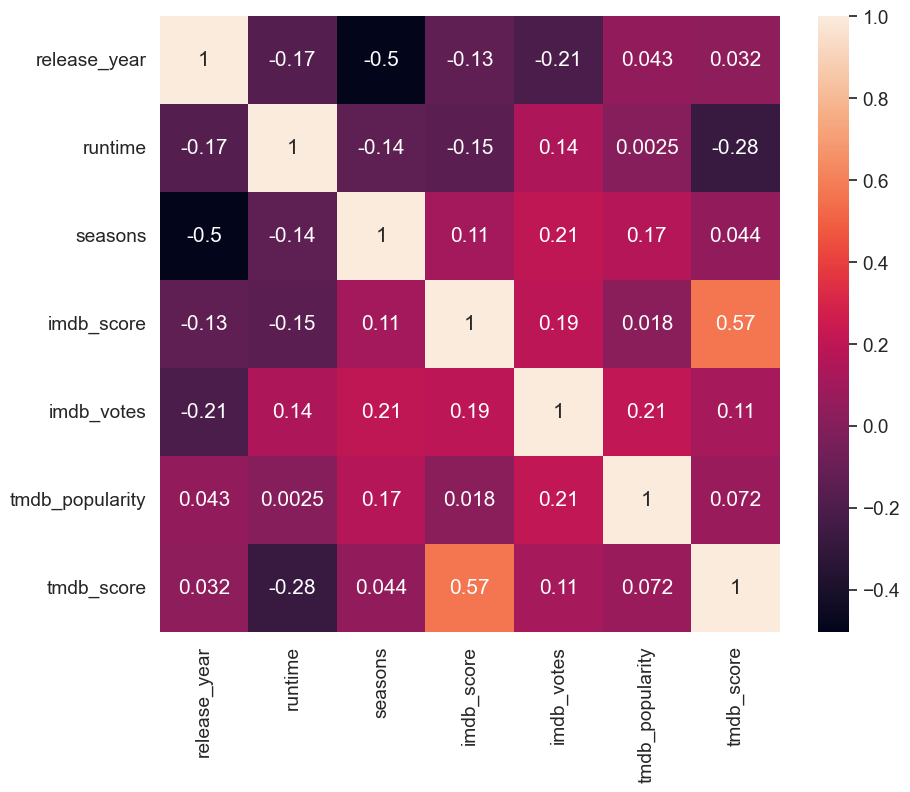

In [203]:
corr_matrix = my_netflix_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# 9. Remove null values

In [204]:
new_netflix_data = my_netflix_data
new_netflix_data.replace(np.nan,'0',inplace = True)
#Check the changes now
new_netflix_data.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

# 10. Display top six rows of the cleaned data

In [205]:
netflix_clean_data = new_netflix_data
netflix_clean_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,0,0,0,0.6,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673.0,10.01,7.3
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,0,150,"['war', 'action']","['GB', 'US']",0,tt0061578,7.7,72662.0,20.398,7.6


# 11. Describe cleaned data

In [206]:
netflix_clean_data.describe(include="all")

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5850,5850,5850,5850.000000,5850,5850.000000,5850,5850,5850,5850,5850,5850,5850,5850
unique,5850,5799,2,5830,NaN,12,NaN,1726,452,27,5448,81,3881,4890,395
top,ts300399,The Gift,MOVIE,0,NaN,0,NaN,['comedy'],['US'],0,0,0,0,0,0
freq,1,3,3744,18,NaN,2619,NaN,484,1959,3744,403,482,498,91,311
mean,NaN,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 12. Display bar chart after cleaning the data for missing values

<AxesSubplot:>

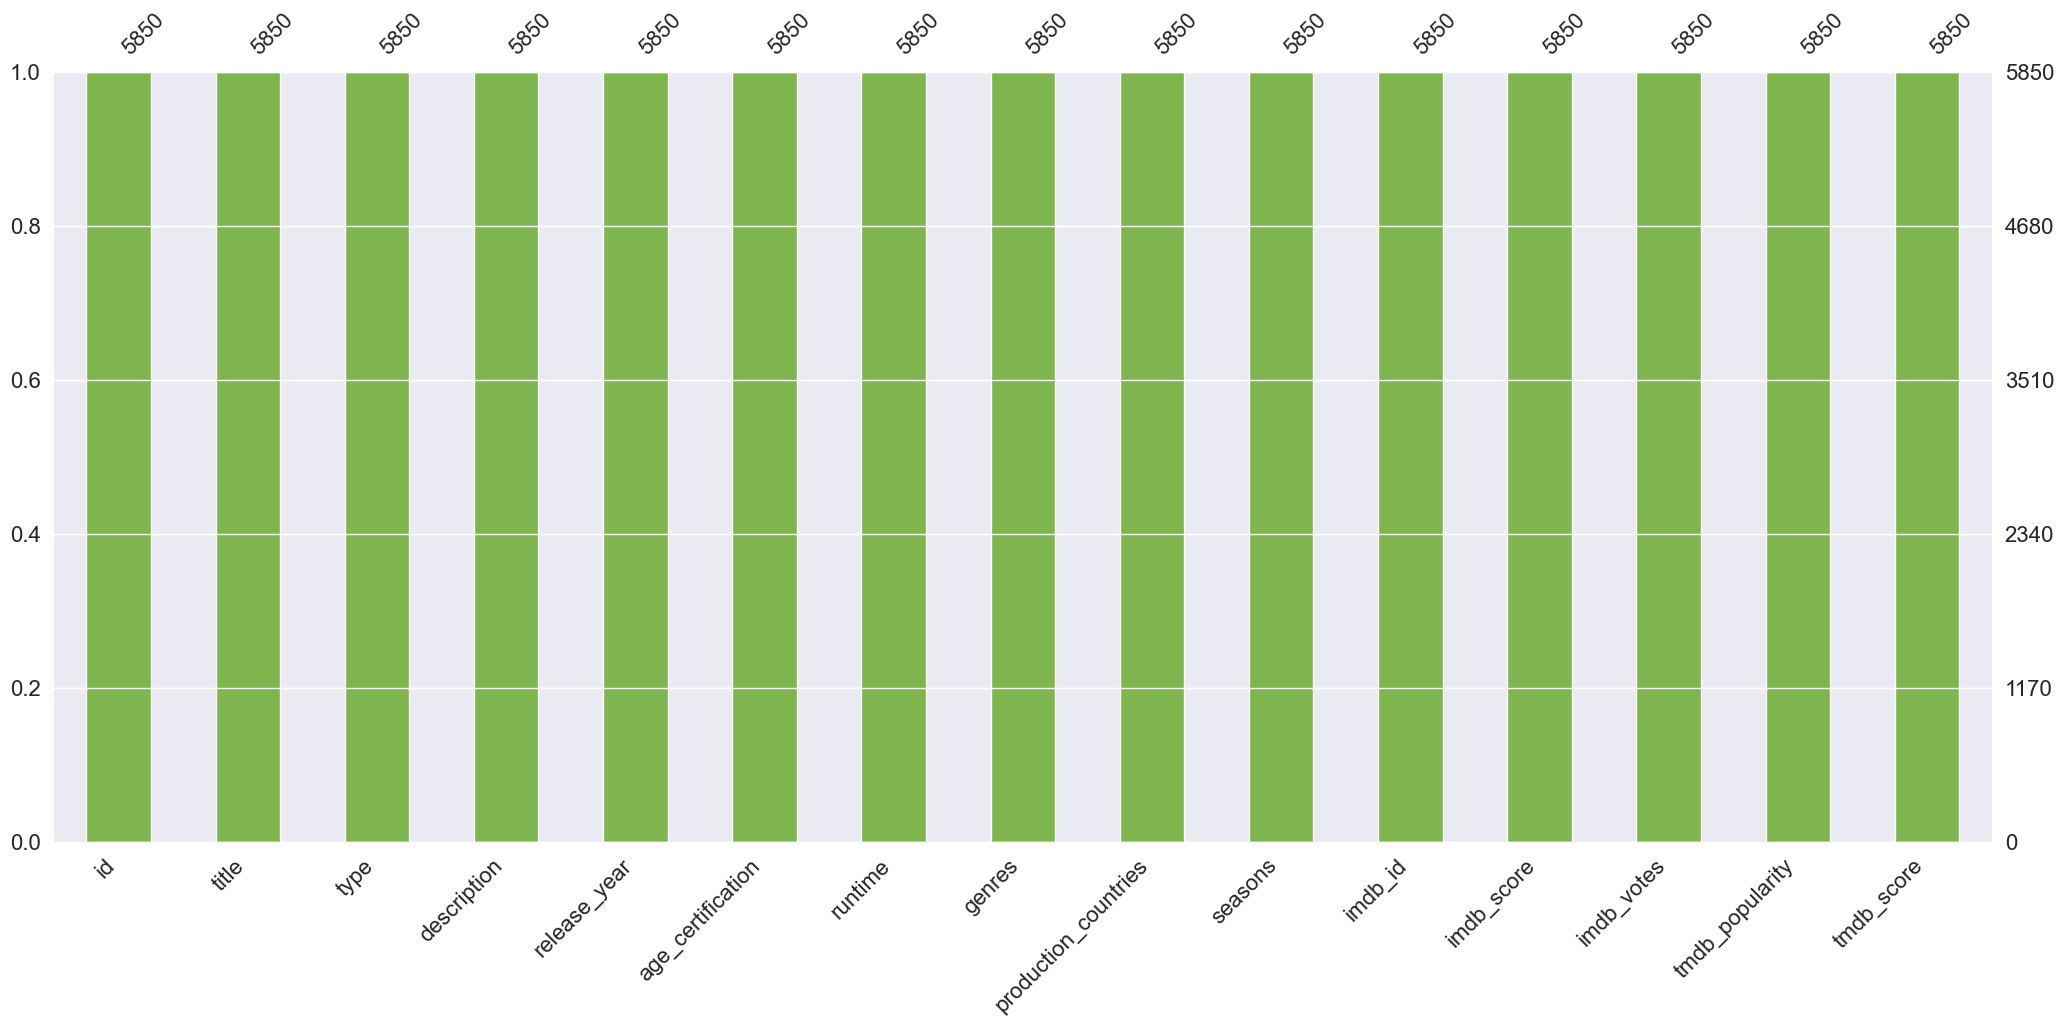

In [207]:
msno.bar(netflix_clean_data, color = "#7eb54e")

# Data Visualization of the dataset

# 1. Plot the pie chart title group by type

<AxesSubplot:ylabel='runtime'>

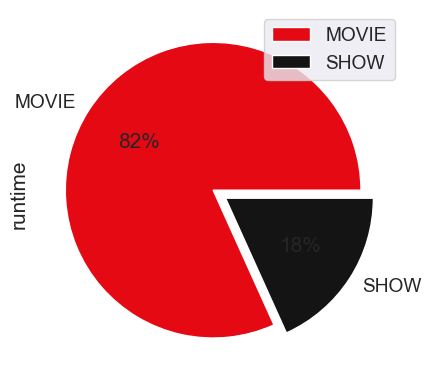

In [208]:
colors = ['#e50914', '#141414']
explode = (0.05, 0.05)
netflix_clean_data.groupby(['type']).sum().plot(
    kind='pie', y='runtime', autopct='%1.0f%%', explode=explode, colors = colors)

# 2. Create a box plot for type and geners

<AxesSubplot:title={'center':'runtime'}, xlabel='type'>

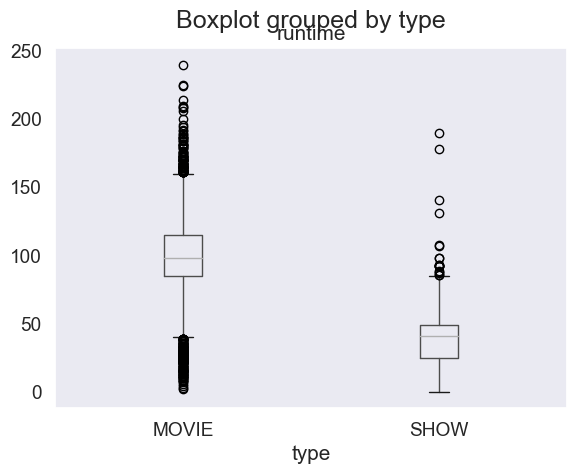

In [209]:
netflix_clean_data.boxplot(by ='type', column =['runtime'], grid = False)

# 3. Scatterplot to show  the relationship between seasons and released year

<AxesSubplot:xlabel='seasons', ylabel='release_year'>

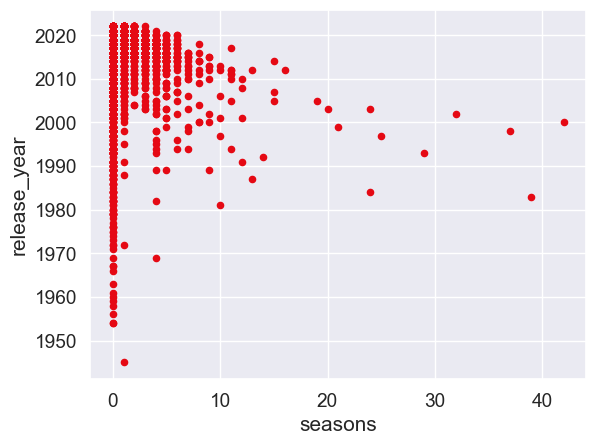

In [210]:
netflix_clean_data.plot.scatter(x='seasons', y='release_year', color='#e50914')